# Example for Linear Regression
- story (Procedure of applied ML)
    - Preparation
        - Make the purpose (goal) clear.
        - Make the task concrete.
        - Check the possibilities to replace the existing services.
    - Prepare the dataset
    - Select a model
    - Continue learning, evaluation and tuning
- ref.
    - [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [78]:
# Prepare the dataset
# Load the diabetes dataset
# ref. https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

from sklearn import datasets
diabetes = datasets.load_diabetes()

orig_X = diabetes.data
print(orig_X.shape)
print(orig_X)
print(diabetes.feature_names)

(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [79]:
# Here, use just one feature 'bmi' for simple exercise
import numpy as np
X = diabetes.data[:, np.newaxis, 2]
print(X.shape)
print(X)

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 

In [80]:
y = diabetes.target
print(y.shape)
print(y)

(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.

In [81]:
# split the dataset into training and testing set
num_of_training = 400

X_train = X[:num_of_training]
X_test = X[num_of_training:]

y_train = y[:num_of_training]
y_test = y[num_of_training:]

print(X_train.shape)
print(X_test.shape)

(400, 1)
(42, 1)


In [82]:
# Select a model
# => Linear Regression

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_train, y_train)

# Make predictions using the testing set
predicted = regr.predict(X_test)

# Check the predictions vs true answer
print(np.c_[predicted, y_test])

[[196.51241167 175.        ]
 [109.98667708  93.        ]
 [121.31742804 168.        ]
 [245.95568858 275.        ]
 [204.75295782 293.        ]
 [270.67732703 281.        ]
 [ 75.99442421  72.        ]
 [241.8354155  140.        ]
 [104.83633574 189.        ]
 [141.91879342 181.        ]
 [126.46776938 209.        ]
 [208.8732309  136.        ]
 [234.62493762 261.        ]
 [152.21947611 113.        ]
 [159.42995399 131.        ]
 [161.49009053 174.        ]
 [229.47459628 257.        ]
 [221.23405012  55.        ]
 [129.55797419  84.        ]
 [100.71606266  42.        ]
 [118.22722323 146.        ]
 [168.70056841 212.        ]
 [227.41445974 233.        ]
 [115.13701842  91.        ]
 [163.55022706 111.        ]
 [114.10695016 152.        ]
 [120.28735977 120.        ]
 [158.39988572  67.        ]
 [237.71514243 310.        ]
 [121.31742804  94.        ]
 [ 98.65592612 183.        ]
 [123.37756458  66.        ]
 [205.78302609 173.        ]
 [ 95.56572131  72.        ]
 [154.27961264

In [83]:
# Check the differences (errors)
print(y_test - predicted)

[ -21.51241167  -16.98667708   46.68257196   29.04431142   88.24704218
   10.32267297   -3.99442421 -101.8354155    84.16366426   39.08120658
   82.53223062  -72.8732309    26.37506238  -39.21947611  -28.42995399
   12.50990947   27.52540372 -166.23405012  -45.55797419  -58.71606266
   27.77277677   43.29943159    5.58554026  -24.13701842  -52.55022706
   37.89304984   -0.28735977  -91.39988572   72.28485757  -27.31742804
   84.34407388  -57.37756458  -32.78302609  -23.56572131 -105.27961264
  -66.58804246  -34.17483382    6.20922678  -33.79852034   -5.79852034
   29.66799794  -26.20490209]


In [84]:
# Check the sum of absolute error
print(sum(np.abs(y_test - predicted)))

# MAE (Mean Absolute Error)
print(sum(np.abs(y_test - predicted)) / len(X_test))

1890.1633693291935
45.00388974593318


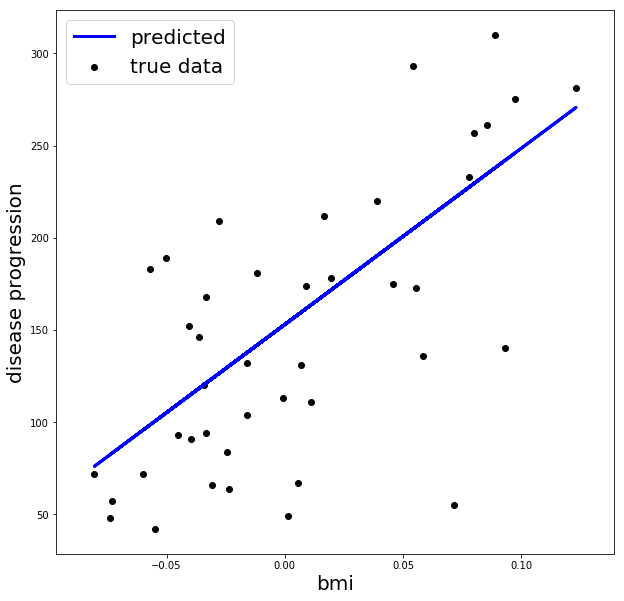

In [85]:
# Plot testing set and predictions
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(X_test, y_test,  color='black', label='true data')
ax.plot(X_test, predicted, color='blue', linewidth=3, label='predicted')
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('bmi', fontsize=20)
ax.set_ylabel('disease progression', fontsize=20)
plt.show()


In [86]:
# Check the model (obtained parameters)
print('coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

coefficients:  [955.70303385]
intercept:  153.00018395675963
